In [1]:
# Goal is to test for the contours and curvature of a region
# These should be useful as features!

from facet_ml.segmentation.segmenter import ImageSegmenter
from facet_ml.segmentation import features as feat 

import cv2
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
image_path = "../Images/Training/4 nM 1.bmp"
threshold_mode = "segment_anything"
IS = ImageSegmenter(image_path,threshold_mode=threshold_mode)
region_dict = IS.grab_region_dict(focused=True,alpha=0)
region = feat.Region(region_dict[2])

cuda:0


C:\Users\Jacob\Desktop\Academicsa\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:611: RuntimeWarning: invalid value encountered in divide
  clusters["major_axis_length"] / clusters["minor_axis_length"]
C:\Users\Jacob\Desktop\Academicsa\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:614: RuntimeWarning: invalid value encountered in divide
  clusters["perimeter"] / clusters["major_axis_length"]
C:\Users\Jacob\Desktop\Academicsa\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\segmenter.py:617: RuntimeWarning: invalid value encountered in divide
  clusters["perimeter"] / clusters["minor_axis_length"]
C:\Users\Jacob\Desktop\Academicsa\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, 

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

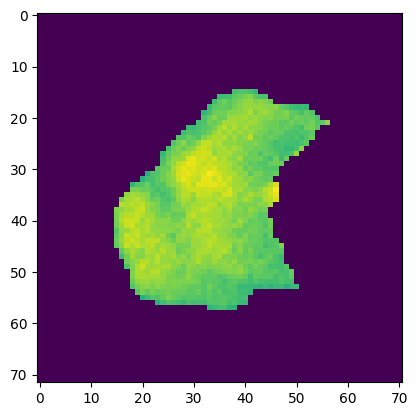

In [ ]:
# Check image works
plt.imshow(region.region)
region.binary


In [ ]:


cf = feat.AverageCurvatureFeaturizer(
    #min_contour_length=20, 
    #window_size_ratio=1
    )
print(cf.min_contour_length)
val = cf.apply_featurizer(region)
edge_pixels, curvature_values = feat.get_region_curvatures(region)

20


In [ ]:
featurizer_list = [
    feat.AverageCurvatureFeaturizer(),
    feat.StdCurvatureFeaturizer(),
    feat.MinCurvatureFeaturizer(),
    feat.MaxCurvatureFeaturizer(),
    feat.PercentConvexityCurvatureFeaturizer(),
    feat.LongestContiguousConcavityCurvatureFeaturizer(),
    feat.LongestContiguousConvexityCurvatureFeaturizer()
]

region.featurizers.extend(featurizer_list)
region.featurize()

{'mean_curvature': 0.009439151045495824,
 'std_curvature': 0.10190107277245491,
 'min_curvature': -0.35275652847163347,
 'max_curvature': 0.45199408324155654,
 'percent_convexity_curvature': 63.78378378378379,
 'longest_contiguous_percent_concavity_curvature': 18.37837837837838,
 'longest_contiguous_percent_convexity_curvature': 34.054054054054056}

In [ ]:
convex_paths, concave_paths = feat.find_contiguous_curvatures(edge_pixels,curvature_values)
import numpy as np
print(len(concave_paths),len(convex_paths))
for p in convex_paths:
    print(len(p))

7 7
63
44
1
4
1
3
2


In [ ]:
import numpy as np

cmap = plt.get_cmap("Spectral")
norm = plt.Normalize(vmin=-1,vmax=1)
contour = contours[0]
#plt.imshow(contours[0])
plt.scatter(edge_pixels[:,0],edge_pixels[:,1],c=curvature_values,cmap=cmap,norm=norm)
plt.colorbar()

NameError: name 'contours' is not defined

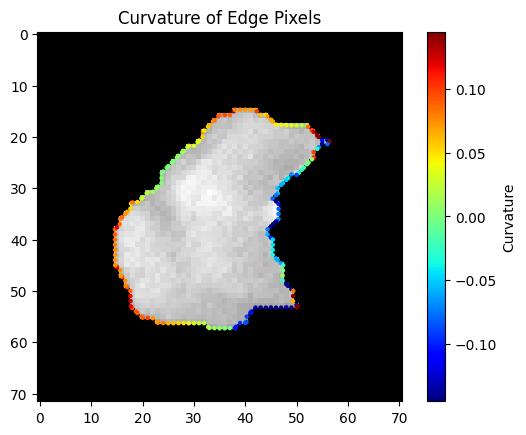

In [ ]:
# Compute edge properties
#edge_pixels, curvature_values = compute_curvature_profile(mask, min_contour_length, window_size_ratio)

# Plot the mask
plt.imshow(region.region, cmap='gray')
# We set the min and max of the colorbar, so that 90% of the curvature values are shown.
# This is to have a nice visualization. You can change this threshold according to your specific task.
threshold = np.percentile(np.abs(curvature_values), 90)
plt.scatter(edge_pixels[:, 1], edge_pixels[:, 0], c=curvature_values, cmap='jet', s=5, vmin=-threshold, vmax=threshold)

plt.colorbar(label='Curvature')
plt.title("Curvature of Edge Pixels")
plt.show()